In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

In [15]:
df = pd.read_csv(r'C:\Users\zalay\Downloads\DOWNLOADS\Mall_Customers.csv', index_col = 0)

df.head()

In [16]:
df.describe(include = 'all')
print(df.isnull().sum())

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [17]:
X = df.values[: , [2,3]]

In [18]:
wsse =[]
for i in range(1,11):
    kmeans = KMeans( n_clusters= i, random_state =10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)

## Elbow method to find out the optimum value of K


#### For this case, Elbow point is K=5 after which No significant change in WSSE(within-cluster sum of squared error) as K changes. 

Text(0, 0.5, 'WSSE')

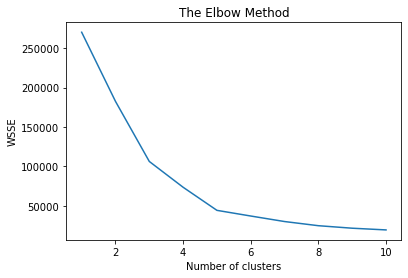

In [19]:
plt.plot(range(1,11), wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')

In [20]:
kmeans = KMeans (n_clusters = 5 , random_state = 10)
Y_pred = kmeans.fit_predict(X)

In [21]:
kmeans.n_iter_

3

In [22]:
df["clusters"] =Y_pred
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
CustomerID,,,,,
1,Male,19,15,39,2
2,Male,21,15,81,3
3,Female,20,16,6,2
4,Female,23,16,77,3
5,Female,31,17,40,2


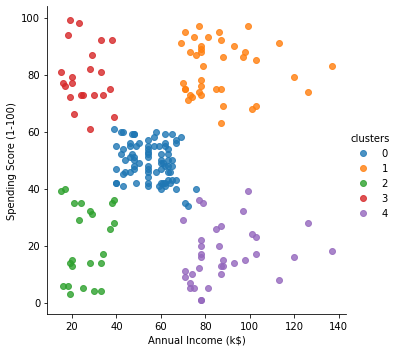

In [23]:
sns.lmplot(data =df , x = "Annual Income (k$)" , y = "Spending Score (1-100)" , fit_reg = False , hue = 'clusters')
plt.savefig('Figure.png')

In [24]:
df["clusters"] = df.clusters.map({ 0 : "Standard" , 1: "Target" , 2:"Sensible" , 3 : "Careless", 4 : "Careful"})

In [25]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
CustomerID,,,,,
1,Male,19,15,39,Sensible
2,Male,21,15,81,Careless
3,Female,20,16,6,Sensible
4,Female,23,16,77,Careless
5,Female,31,17,40,Sensible
